In [8]:
import os
import sys
import pandas as pd
import numpy as np
import json
import re
import warnings
from scipy import stats
from dotenv import load_dotenv

import matplotlib.pyplot as plt

project_name = 'DataGenie'

warnings.filterwarnings('ignore', message='Could not infer format')


base_pth = os.getcwd().split(project_name)[0] + f'{project_name}/'

sys.path.append(base_pth)

from datagenie.utils.llm_agent.agent import Agent
from datagenie.utils.llm.gemini import Gemini
from datagenie.datascience.agent import DataAnalystAgent

In [9]:
data_loc = base_pth+'notebook_io/data_agent/input/Titanic-Dataset.csv'


In [10]:

api_key = os.getenv('GOOGLE_API_KEY')
gemini_llm  = Gemini(api_key=api_key)

In [11]:
data_analyst_agent = DataAnalystAgent(data_loc,api_key)

In [12]:
data_analyst_agent.think('tell me all columns')

The DataFrame contains the following columns:

*   `PassengerId`
*   `Survived`
*   `Pclass`
*   `Name`
*   `Sex`
*   `Age`
*   `SibSp`
*   `Parch`
*   `Ticket`
*   `Fare`
*   `Cabin`
*   `Embarked`


In [13]:
o = data_analyst_agent.think("give me distibution of age colum")

Exception: Gemini API call failed: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}

(np.float64(-0.5), np.float64(840.5), np.float64(546.5), np.float64(-0.5))

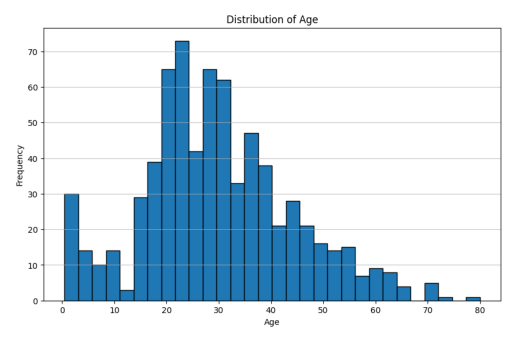

In [14]:
from io import BytesIO
import base64
from PIL import Image

# Decode the base64 string and display the image
img_data = base64.b64decode(o['data'])
img = Image.open(BytesIO(img_data))

plt.imshow(img)
plt.axis('off')  # Turn off axes for better visualization